## Password Analysis Project

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math

import random 

from mpl_toolkits.mplot3d import axes3d

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests


In [2]:
pass_list1 = pd.read_csv('Data/yahoo.txt',sep='delimiter', header = None,engine='python')
pass_list2 = pd.read_csv('Data/hotmail.txt',sep='delimiter', header = None,engine='python')
pass_list3 = pd.read_csv('Data/netflix.txt',sep='delimiter', header = None,engine='python')

In [3]:
new_password_list1=pass_list1[0].str.lower()
new_password_list2=pass_list2[0].str.lower()
new_password_list3=pass_list3[0].str.lower()

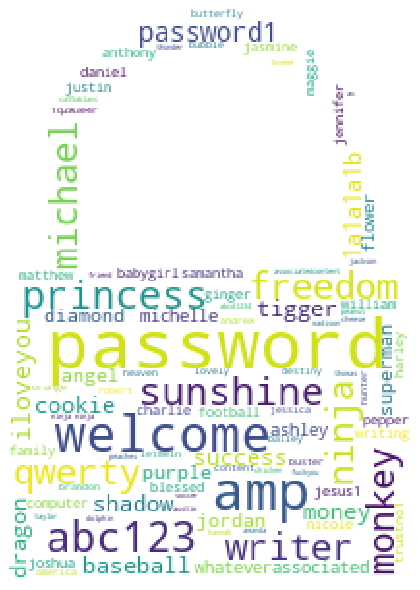

In [4]:
password_list=pd.concat([pass_list1,pass_list2,pass_list3],ignore_index=True)
words = ' '.join(password_list[0].tolist())
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/5/f/c/b/11949849031724482640padlock_silhouette_a.j.__01.svg.med.png', stream=True).raw))
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_wordcloud(words, mask)

In [5]:
english_words = pd.read_csv('Data/Dictionary_Words.txt', header = None,engine='python')
places = pd.read_csv('Data/Places.txt',sep='delimiter', header = None,engine='python')
names= pd.read_csv('Data/names.txt',sep='delimiter', header = None,engine='python')
keyboard_patterns= pd.read_csv('Data/keyboard_dic.txt',sep='delimiter', header = None,engine='python')

In [6]:
english_words.drop_duplicates(inplace=True)
places.drop_duplicates(inplace=True)
names.drop_duplicates(inplace=True)
keyboard_patterns.drop_duplicates(inplace=True)

In [7]:
english_words[0].str.lower()
names[0].str.lower()
keyboard_patterns[0].str.lower()
places=places[0].str.lower();
places=pd.DataFrame(places)

In [8]:
english_words=english_words[[(len(str(x)) >=4) for x in english_words[0]]]
names=names[[(len(str(x)) >=4) for x in names[0]]]
places=places[[(len(str(x)) >=4) for x in places[0]]]

In [9]:
all_lists=pd.concat([names,places,english_words],ignore_index=True)

In [10]:
all_lists.drop_duplicates(inplace=True)

In [11]:
nam=all_lists.loc[0:224097]

In [12]:
plac=all_lists.loc[224098:319809]

In [13]:
words=all_lists.loc[319810:]

In [14]:
new_password_list1=pd.DataFrame(new_password_list1)
new_password_list2=pd.DataFrame(new_password_list2)
new_password_list3=pd.DataFrame(new_password_list3)

In [15]:
print(len(new_password_list1))
print(len(new_password_list2))
print(len(new_password_list3))

442838
9812
1832


In [16]:
new_password_list1=new_password_list1.head(500)
new_password_list2=new_password_list2.head(500)
new_password_list3=new_password_list3.head(500)

In [17]:
#nam = nam.head(500)
#plac = plac.head(500)
#words = words.head(500)

In [18]:
#keyboard_patterns = keyboard_patterns.head(500)

### count of passwords that contain keyboard patterns

In [19]:
passwords1=new_password_list1.copy()
count_keys1=0
passwords_with_keys1=pd.DataFrame()
for i in keyboard_patterns.index.tolist():
    password_words1=passwords1[passwords1[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]
    if(len(password_words1)>0):
        passwords_with_keys1=passwords_with_keys1.append(password_words1,ignore_index=True)
        count_keys1+=len(password_words1)
        passwords1=passwords1[~passwords1[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]

print(count_keys1)

24


In [20]:
passwords2=new_password_list2.copy()
count_keys2=0
passwords_with_keys2=pd.DataFrame()
for i in keyboard_patterns.index.tolist():
    password_words2=passwords2[passwords2[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]
    if(len(password_words2)>0):
        passwords_with_keys2=passwords_with_keys2.append(password_words2,ignore_index=True)
        count_keys2+=len(password_words2)
        passwords2=passwords2[~passwords2[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]

print(count_keys2)

32


In [21]:
passwords3=new_password_list3.copy()
count_keys3=0
passwords_with_keys3=pd.DataFrame()
for i in keyboard_patterns.index.tolist():
    password_words3=passwords3[passwords3[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]
    if(len(password_words3)>0):
        passwords_with_keys3=passwords_with_keys3.append(password_words3,ignore_index=True)
        count_keys3+=len(password_words3)
        passwords3=passwords3[~passwords3[0].str.contains(str(keyboard_patterns[0][i]),regex=False)]

print(count_keys3)

32


5.0
6.0
6.0


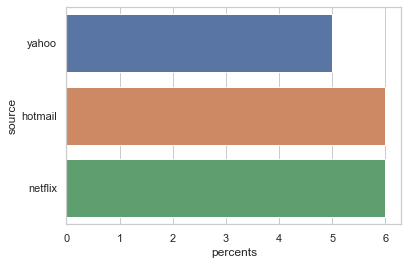

In [22]:
percent1=count_keys1/len(new_password_list1)
percent1=round(percent1,2)
percent_keyboard1=percent1*100

percent2=count_keys2/len(new_password_list2)
percent2=round(percent2,2)
percent_keyboard2=percent2*100

percent3=count_keys3/len(new_password_list3)
percent3=round(percent3,2)
percent_keyboard3=percent3*100


print(percent_keyboard1)
print(percent_keyboard2)
print(percent_keyboard3)

percents = {'source':['yahoo','hotmail','netflix'], 'percents': [percent_keyboard1, percent_keyboard2, percent_keyboard3]}
percents_df = pd.DataFrame(data=percents)



sns.set(style="whitegrid")
ax = sns.barplot(x="percents", y="source", data=percents_df)

In [23]:
keyPercent = []
keyPercent.append(percent_keyboard1)
keyPercent.append(percent_keyboard2)
keyPercent.append(percent_keyboard3)
print(keyPercent)

[5.0, 6.0, 6.0]


### Count all passwords that contain english words

In [24]:
count_words1=0
passwords_with_words1=pd.DataFrame()
for i in words.index.tolist():
    password_words1=passwords1[passwords1[0].str.contains(str(words[0][i]),regex=False)]
    if(len(password_words1)>0):
        passwords_with_words1=passwords_with_words1.append(password_words1,ignore_index=True)
        count_words1+=len(password_words1)
        passwords1=passwords1[~passwords1[0].str.contains(str(words[0][i]),regex=False)]

print(count_words1)

121


In [25]:
count_words2=0
passwords_with_words2=pd.DataFrame()
for i in words.index.tolist():
    password_words2=passwords2[passwords2[0].str.contains(str(words[0][i]),regex=False)]
    if(len(password_words2)>0):
        passwords_with_words2=passwords_with_words2.append(password_words2,ignore_index=True)
        count_words2+=len(password_words2)
        passwords2=passwords2[~passwords2[0].str.contains(str(words[0][i]),regex=False)]

print(count_words2)

81


In [26]:
count_words3=0
passwords_with_words3=pd.DataFrame()
for i in words.index.tolist():
    password_words3=passwords3[passwords3[0].str.contains(str(words[0][i]),regex=False)]
    if(len(password_words3)>0):
        passwords_with_words3=passwords_with_words3.append(password_words3,ignore_index=True)
        count_words3+=len(password_words3)
        passwords3=passwords3[~passwords3[0].str.contains(str(words[0][i]),regex=False)]

print(count_words3)

91


24.0
16.0
18.0


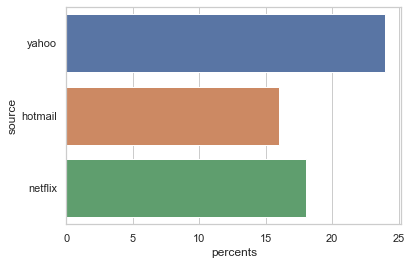

In [27]:
count1=count_words1
percent1=count1/len(new_password_list1)
percent1=round(percent1,2)
percent_words1=percent1*100

count2=count_words2
percent2=count2/len(new_password_list2)
percent2=round(percent2,2)
percent_words2=percent2*100

count3=count_words3
percent3=count3/len(new_password_list3)
percent3=round(percent3,2)
percent_words3=percent3*100

print(percent_words1)
print(percent_words2)
print(percent_words3)

percents = {'source':['yahoo','hotmail','netflix'], 'percents': [percent_words1, percent_words2, percent_words3]}
percents_df = pd.DataFrame(data=percents)



sns.set(style="whitegrid")
ax = sns.barplot(x="percents", y="source", data=percents_df)

In [28]:
englishPercent = []
englishPercent.append(percent_words1)
englishPercent.append(percent_words2)
englishPercent.append(percent_words3)
print(englishPercent)

[24.0, 16.0, 18.0]


## Count all passwords that contain places words

In [29]:
count_places1=0
passwords_with_places1=pd.DataFrame()
for i in plac.index.tolist():
    password_words1=passwords1[passwords1[0].str.contains(str(plac[0][i]),regex=False)]
    if(len(password_words1)>0):
        passwords_with_places1=passwords_with_places1.append(password_words1,ignore_index=True)
        count_places1+=len(password_words1)
        passwords1=passwords1[~passwords1[0].str.contains(str(plac[0][i]),regex=False)]

print(count_places1)

106


In [30]:
count_places2=0
passwords_with_places2=pd.DataFrame()
for i in plac.index.tolist():
    password_words2=passwords2[passwords2[0].str.contains(str(plac[0][i]),regex=False)]
    if(len(password_words2)>0):
        passwords_with_places2=passwords_with_places2.append(password_words2,ignore_index=True)
        count_places2+=len(password_words2)
        passwords2=passwords2[~passwords2[0].str.contains(str(plac[0][i]),regex=False)]

print(count_places2)

63


In [31]:
count_places3=0
passwords_with_places3=pd.DataFrame()
for i in plac.index.tolist():
    password_words3=passwords3[passwords3[0].str.contains(str(plac[0][i]),regex=False)]
    if(len(password_words3)>0):
        passwords_with_places3=passwords_with_places3.append(password_words3,ignore_index=True)
        count_places3+=len(password_words3)
        passwords3=passwords3[~passwords3[0].str.contains(str(plac[0][i]),regex=False)]

print(count_places3)

101


21.0
13.0
20.0


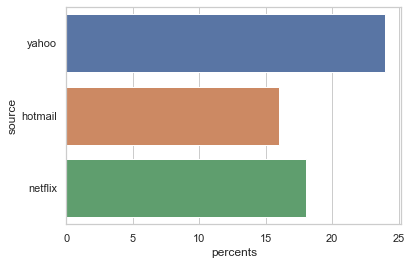

In [32]:
percent1=count_places1/len(new_password_list1)
percent1=round(percent1,2)
percent_places1=percent1*100

percent2=count_places2/len(new_password_list2)
percent2=round(percent2,2)
percent_places2=percent2*100

percent3=count_places3/len(new_password_list3)
percent3=round(percent3,2)
percent_places3=percent3*100

print(percent_places1)
print(percent_places2)
print(percent_places3)

sns.set(style="whitegrid")
ax = sns.barplot(x="percents", y="source", data=percents_df)

In [33]:
placesPercent = []
placesPercent.append(percent_places1)
placesPercent.append(percent_places2)
placesPercent.append(percent_places3)
print(placesPercent)

[21.0, 13.0, 20.0]


## Count all passwords that contain names

In [34]:
count_names1=0
passwords_with_names1=pd.DataFrame()
for i in nam.index.tolist():
    password_words1=passwords1[passwords1[0].str.contains(str(nam[0][i]),regex=False)]
    if(len(password_words1)>0):
        passwords_with_names1=passwords_with_names1.append(password_words1,ignore_index=True)
        count_names1+=len(password_words1)
        passwords1=passwords1[~passwords1[0].str.contains(str(nam[0][i]),regex=False)]

print(count_names1)

162


In [35]:
count_names2=0
passwords_with_names2=pd.DataFrame()
for i in nam.index.tolist():
    password_words2=passwords2[passwords2[0].str.contains(str(nam[0][i]),regex=False)]
    if(len(password_words2)>0):
        passwords_with_names2=passwords_with_names2.append(password_words2,ignore_index=True)
        count_names2+=len(password_words2)
        passwords2=passwords2[~passwords2[0].str.contains(str(nam[0][i]),regex=False)]

print(count_names2)

193


In [36]:
count_names3=0
passwords_with_names3=pd.DataFrame()
for i in nam.index.tolist():
    password_words3=passwords3[passwords3[0].str.contains(str(nam[0][i]),regex=False)]
    if(len(password_words3)>0):
        passwords_with_names3=passwords_with_names3.append(password_words3,ignore_index=True)
        count_names3+=len(password_words3)
        passwords3=passwords3[~passwords3[0].str.contains(str(nam[0][i]),regex=False)]

print(count_names3)

174


32.0
39.0
35.0


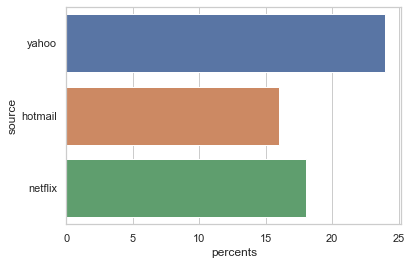

In [37]:
percent1=count_names1/len(new_password_list1)
percent1=round(percent1,2)
percent_names1=percent1*100

percent2=count_names2/len(new_password_list2)
percent2=round(percent2,2)
percent_names2=percent2*100

percent3=count_names3/len(new_password_list3)
percent3=round(percent3,2)
percent_names3=percent3*100

print(percent_names1)
print(percent_names2)
print(percent_names3)

sns.set(style="whitegrid")
ax = sns.barplot(x="percents", y="source", data=percents_df)

In [38]:
namesPercent = []
namesPercent.append(percent_names1)
namesPercent.append(percent_names2)
namesPercent.append(percent_names3)
print(namesPercent)

[32.0, 39.0, 35.0]


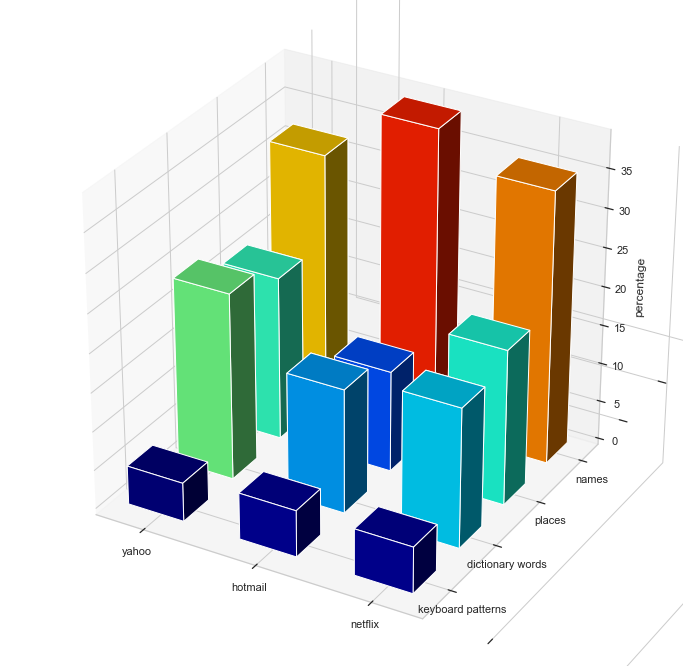

In [39]:
import matplotlib.cm as cm 
data = np.array([
keyPercent,englishPercent,placesPercent,namesPercent
])

column_names = ['yahoo','hotmail','netflix']
row_names = ['keyboard patterns','dictionary words','places','names']


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')


lx= len(data[0])           
ly= len(data[:,0])
xpos = np.arange(0,lx,1)    
ypos = np.arange(0,ly,1)
xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)

xpos = xpos.flatten()   # Convert positions to 1D array
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap
max_height = np.max(dz)   # get range of colorbars
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 
ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color=rgba, zsort='average')

ticksx = np.arange(0.5, 5, 1)
plt.xticks(ticksx, column_names)

ticksy = np.arange(0.6, 7, 1)
plt.yticks(ticksy, row_names)

#ax.set_xlabel('passwords')
#ax.set_ylabel('sources')
ax.set_zlabel('percentage')

plt.show()